In [1]:
import scipy.io as sio
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from openTSNE import TSNE
from Utilities import openTSNE_utils

In [2]:
# hyperparameters
RANDOM_STATE = 1
TEST_SIZE = 0.33
TSNE_PERPLEXITY = 30

In [3]:
# load data
EEG_X = sio.loadmat('./SEED_III/EEG_X.mat')['X'][0]     # 15 x 3394 x 310
EEG_Y = sio.loadmat('./SEED_III/EEG_Y.mat')['Y'][0]     # 15 x 3394 x 1

Features = [0] * EEG_X.shape[0]
for i in range(EEG_X.shape[0]):
    Features[i] = np.array(EEG_X[i])

Labels = [0] * EEG_Y.shape[0]
for i in range(EEG_Y.shape[0]):
    Labels[i] = np.array(EEG_Y[i])

print(len(Features))
print(Features[0].shape)
print(len(Labels))
print(Labels[0].shape)

15
(3394, 310)
15
(3394, 1)


In [4]:
x_train = []
x_test = []
y_train = []
y_test = []
for i in range(len(Features)):
    x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(Features[i], Labels[i], test_size=TEST_SIZE, random_state=RANDOM_STATE)
    x_train.append(x_train_i)
    x_test.append(x_test_i)
    y_train_i = np.squeeze(y_train_i, axis=1).astype(str)
    y_test_i = np.squeeze(y_test_i, axis=1).astype(str)
    y_train.append(y_train_i)
    y_test.append(y_test_i)

print(x_train[0].shape)
print(x_test[0].shape)
print(y_train[0].shape)
print(y_test[0].shape)

(2273, 310)
(1121, 310)
(2273,)
(1121,)


In [5]:
tsnes = []
embedding_trains = []
for i in trange(len(Features)):
    tsne = TSNE(
        perplexity=TSNE_PERPLEXITY,
        metric="euclidean",
        n_jobs=8,
        random_state=RANDOM_STATE,
        verbose=False,
    )
    embedding_train = tsne.fit(x_train[i])
    tsnes.append(tsne)
    embedding_trains.append(embedding_train)

100%|██████████| 15/15 [00:38<00:00,  2.59s/it]


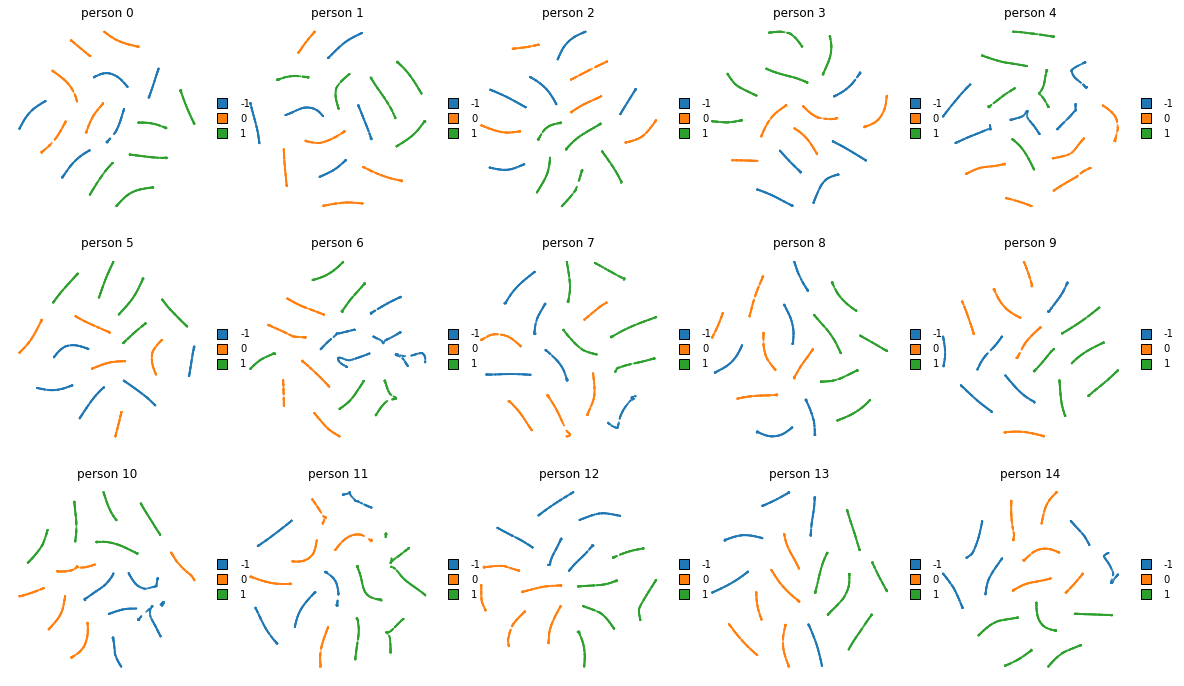

In [14]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for i in range(len(Features)):
    openTSNE_utils.plot(embedding_trains[i], y_train[i], ax=ax[i//5][i%5], title=f"person {i}")

In [16]:
embedding_tests = []
for i in trange(len(Features)):
    embedding_test = embedding_trains[i].transform(x_test[i])
    embedding_tests.append(embedding_test)

100%|██████████| 15/15 [00:10<00:00,  1.42it/s]


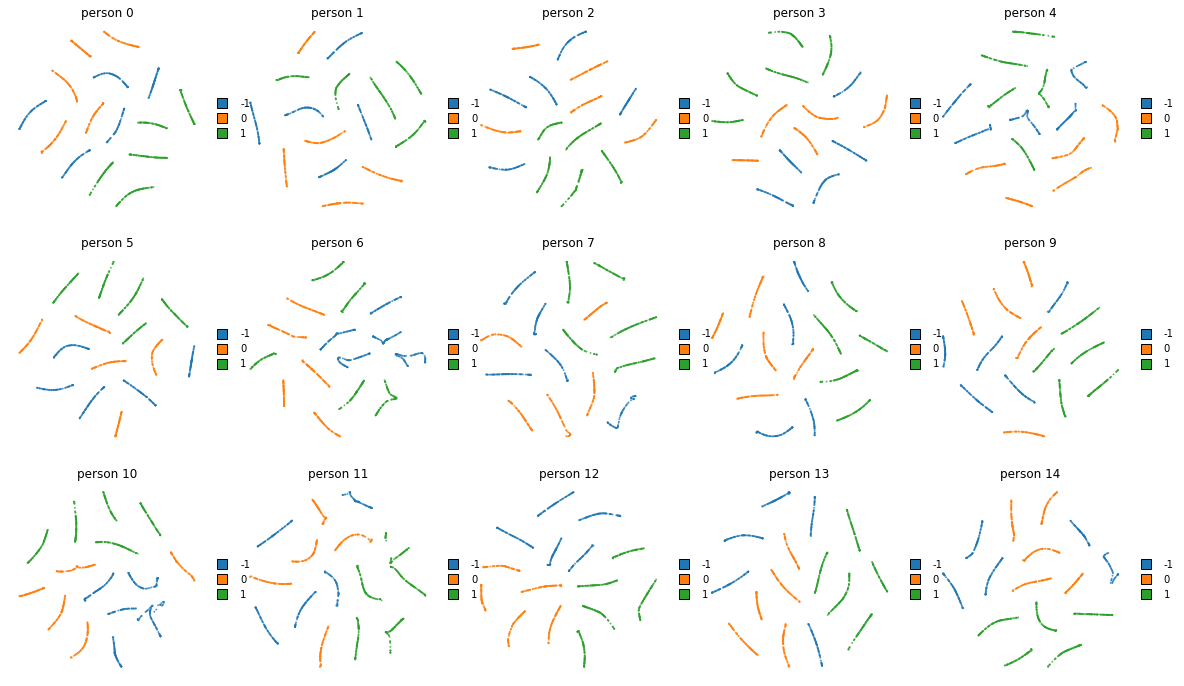

In [17]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for i in range(len(Features)):
    openTSNE_utils.plot(embedding_tests[i], y_test[i], ax=ax[i//5][i%5], title=f"person {i}")

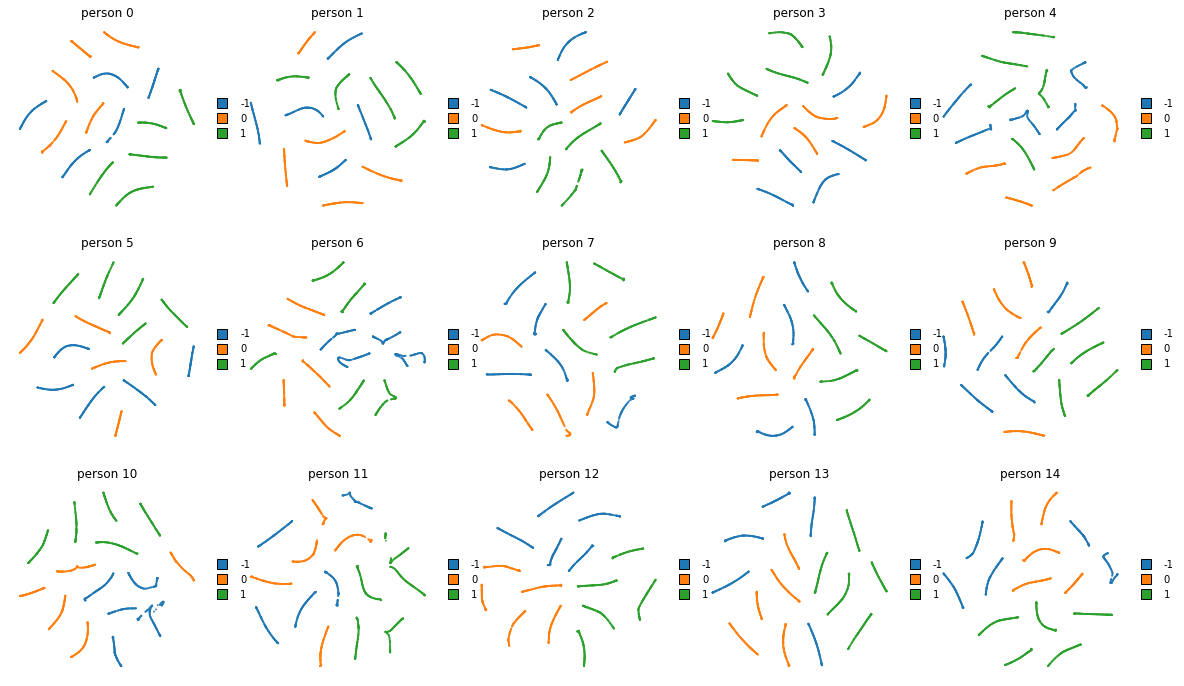

In [20]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for i in range(len(Features)):
    openTSNE_utils.plot(embedding_trains[i], y_train[i], alpha=0.25, ax=ax[i//5][i%5], title=f"person {i}")
    openTSNE_utils.plot(embedding_tests[i], y_test[i], alpha=0.75, ax=ax[i//5][i%5], title=f"person {i}")